Dataset is provided in terms of Kaggle competition https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

#**Load the dataset**

In [207]:
from google.colab import drive
import pandas as pd

In [208]:
drive.mount('/content/gdrive/')
data = pd.read_csv(r"/content/gdrive/My Drive/Datasets/train_housing.csv", header = 0, sep=',')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


The dataset consists of 1460 observations and 81 columns (79 features).

In [209]:
data.shape

(1460, 81)

The column Id is not necessary for the survey.

In [210]:
data.drop('Id', inplace=True, axis=1)

In [211]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


It is important to check the type of features presented.

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

There are 3 features with float64 type, 34 (including target) with int64 type, 43 with object

# **Feature distribution**

Now let's check the histogram of target

In [213]:
import seaborn as sns

<Axes: xlabel='SalePrice', ylabel='Count'>

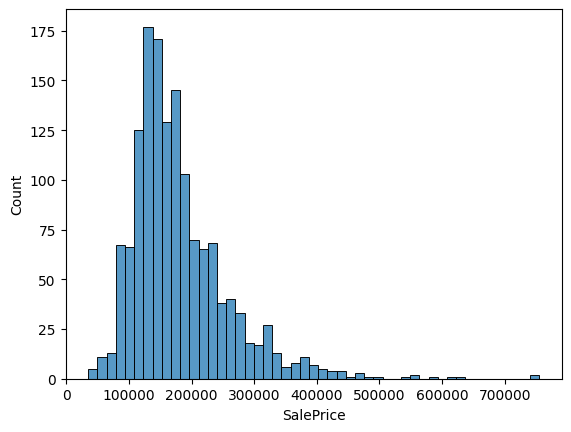

In [214]:
sns.histplot(data['SalePrice'])

In [215]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It can be clearly seen that there are several outliers, atypical observations with target > 500000. They will be researched later. Target data has positive skewness

Now it's important to see the distribution of all numerical values of the dataset.

In [216]:
data_numerical = data.select_dtypes(exclude='object')

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

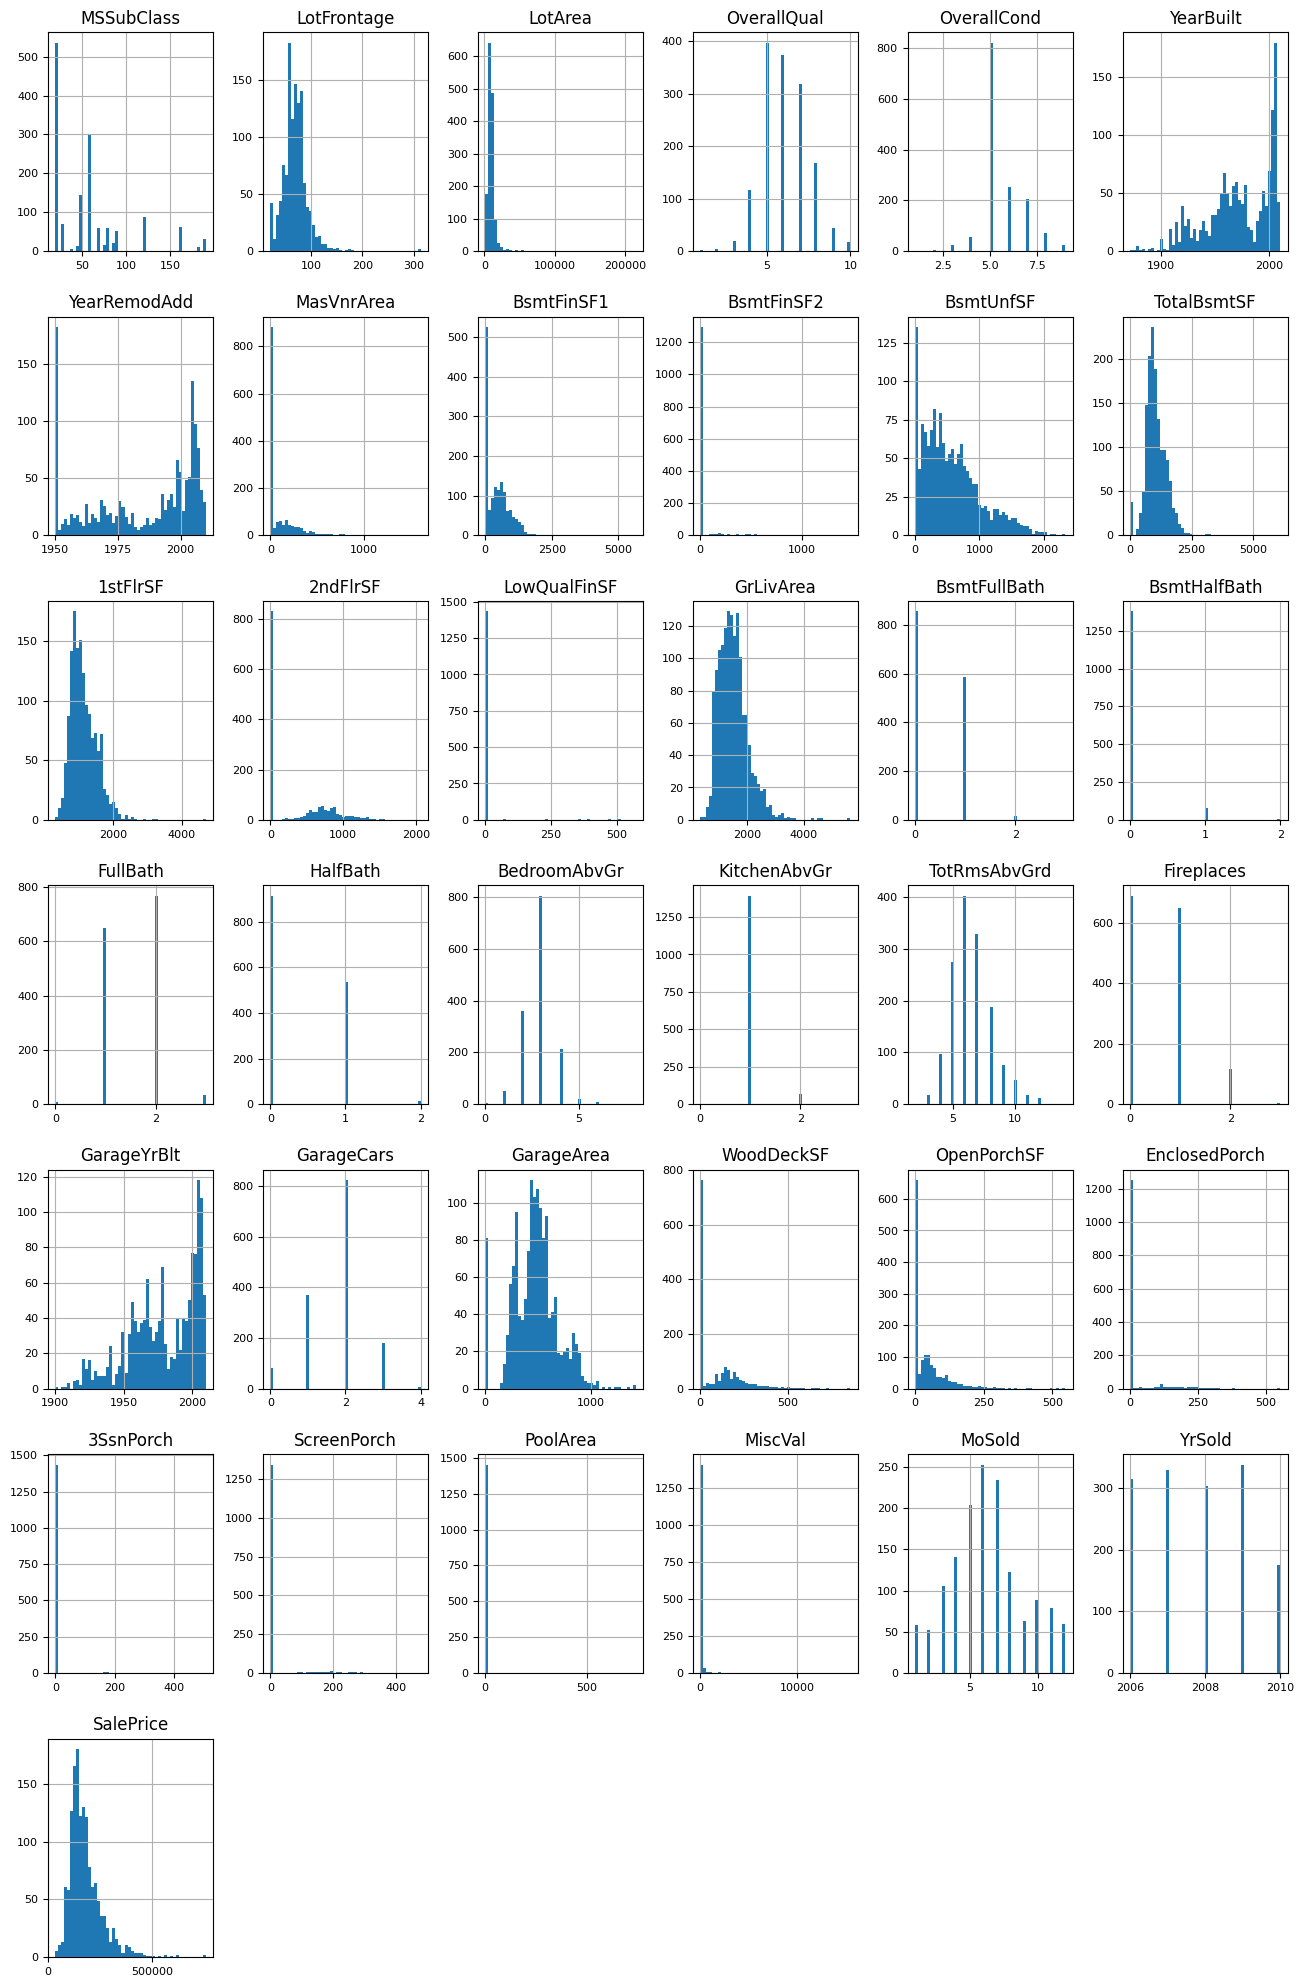

In [217]:
data_numerical.hist(figsize=(16, 25), bins=50, xlabelsize=8, ylabelsize=8)

All numerical features(except categorical) have either positive or negative skewness.

# **Preprocessing**

### Divide into categorical, ordinal, date and numeric features


In [218]:
numeric = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
ordinal = ['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence'] #PoolQC
date = ['YearBuilt','YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [219]:
categorical = ['MSSubClass','MSZoning','Street','LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
 'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'Foundation','Heating','CentralAir','Electrical','BsmtFullBath','BsmtHalfBath', 'FullBath','HalfBath',
 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageCars','SaleType','SaleCondition',]

In [220]:
y = data['SalePrice']

In [221]:
data.drop(['SalePrice'], axis=1, inplace=True)

The division is made on the basis of data description (https://drive.google.com/file/d/1Zw6fX1fdF2ohHEj3teDotR0QSLmwpnpf/view?usp=sharing) and on the values ​​that the features take (they can be clearly observed from the histogram)

### Missing values

There are missing vlaues in dataset

Let's fix the threshold at 90 percent of missing values, such columns are not representative

In [222]:
columns_with_nulls_train = data.columns[data.isnull().any()].tolist()
columns_with_nulls_train

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [223]:
def percentage_of_nan(dataset, nulls):
  my_dict = {}
  for column in nulls:
    my_dict[column] = round(dataset[column].isnull().sum() * 100/dataset.shape[0], 2)
  df = pd.DataFrame(list(my_dict.items()), columns=['Column', 'Percentage'])
  return df

In [224]:
clm_train = percentage_of_nan(data, columns_with_nulls_train)
clm_train[clm_train['Percentage'] > 90]

,Column,Percentage
1,Alley,93.77
16,PoolQC,99.52
18,MiscFeature,96.30


Columns Alley, PoolQC and MiscFeature are not representative

In [225]:
data.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

### Categorical data

And One-hot encoder for other columns with object types

In [226]:
from sklearn.preprocessing import OneHotEncoder

In [227]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder.fit(data[categorical+ordinal])

train_encoded = encoder.transform(data[categorical+ordinal])

train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical+ordinal))

train_preprocessed = pd.concat([data.drop(columns=categorical+ordinal), train_encoded_df], axis=1)

 ### Filling in missing values

In [228]:
train_preprocessed.columns[train_preprocessed.isna().any()].tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [229]:
train_preprocessed[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = train_preprocessed[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].fillna(train_preprocessed[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].mean())

In [230]:
train_preprocessed.columns[train_preprocessed.isna().any()].tolist()

[]

# **First submission:**

### Cross Validation

**The idea** is to try some popular models and then by using feature
selection and feature engineering methods improve its performance

In [231]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
#добавить бустинги

Train with cross validation to fit best parameters

In [232]:
base_tree = DecisionTreeRegressor(random_state=123)

In [233]:
# pipeline_rf = Pipeline([
#     ('variance_threshold', VarianceThreshold()),
#     ('model', RandomForestRegressor(random_state=123))
# ])

# pipeline_gb = Pipeline([
#     ('variance_threshold', VarianceThreshold()),
#     ('model', GradientBoostingRegressor(random_state=123))
# ])

# pipeline_bagging = Pipeline([
#     ('variance_threshold', VarianceThreshold()),
#     ('model', BaggingRegressor(estimator=base_tree))
# ])

# param_grid_rf = {
#     'variance_threshold__threshold': [0, 0.1, 0.2],
#     'model__n_estimators': [50, 100, 200],
#     'model__max_depth': [3, 5, 7]
# }

# param_grid_gb = {
#     'variance_threshold__threshold': [0, 0.1, 0.2],
#     'model__n_estimators': [50, 100, 200],
#     'model__learning_rate': [0.05, 0.1, 0.2]
# }

# param_grid_bagging = {
#     'variance_threshold__threshold': [0, 0.1, 0.2],
#     'model__n_estimators': [50, 100, 200]
# }

# grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)
# grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5)
# grid_search_bagging = GridSearchCV(pipeline_bagging, param_grid_bagging, cv=5)

# grid_search_rf.fit(train_preprocessed, y)
# grid_search_gb.fit(train_preprocessed, y)
# grid_search_bagging.fit(train_preprocessed, y)

# print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
# print("Random Forest - Best Score:", grid_search_rf.best_score_)

# print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)
# print("Gradient Boosting - Best Score:", grid_search_gb.best_score_)

# print("Bagging - Best Parameters:", grid_search_bagging.best_params_)
# print("Bagging - Best Score:", grid_search_bagging.best_score_)


Random Forest - Best Parameters: {'model__max_depth': 7, 'model__n_estimators': 200, 'variance_threshold__threshold': 0}
Random Forest - Best Score: 0.8459780382545784
Gradient Boosting - Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200, 'variance_threshold__threshold': 0}
Gradient Boosting - Best Score: 0.8965552386231413
Bagging - Best Parameters: {'model__n_estimators': 200, 'variance_threshold__threshold': 0}
Bagging - Best Score: 0.8609471719335783


Best model is Gradient Boosting - Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200, 'variance_threshold__threshold': 0}
Gradient Boosting - Best Score: 0.8923504976049385

## Test preprocessing

In [247]:
#for test dataset
test = pd.read_csv(r"/content/gdrive/My Drive/Datasets/test_housing.csv", header = 0, sep=',')

In [235]:
test.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

In [236]:
test.drop(['Id'], inplace=True, axis=1)

In [238]:
test_encoded = encoder.transform(test[categorical+ordinal])

test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical+ordinal))

test_preprocessed = pd.concat([test.drop(columns=categorical+ordinal), test_encoded_df], axis=1)

In [239]:
test_preprocessed[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = test_preprocessed[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].fillna(test_preprocessed[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].mean())

In [240]:
test_preprocessed.columns[test_preprocessed.isna().any()].tolist()

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

In [242]:
test_preprocessed[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']] = test_preprocessed[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']].fillna(test_preprocessed[['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']].mean())

##Submission

In [244]:
gb = GradientBoostingRegressor(random_state=123, n_estimators=200)
gb.fit(train_preprocessed, y)

GradientBoostingRegressor(n_estimators=200, random_state=123)

In [245]:
sample_submission = pd.read_csv(r"/content/gdrive/My Drive/Datasets/sample_submission.csv", header = 0, sep=',')

In [246]:
sample_submission['SalePrice'] = gb.predict(test_preprocessed)
sample_submission.to_csv('submission.csv', index=False)

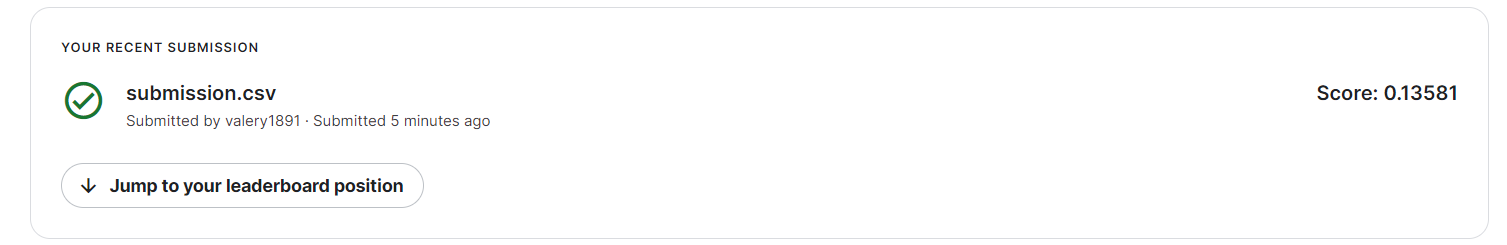

Metric used in this competition is RMSE

# **Feature Selection**

## Feature importances

Models like RandomForestRegressor and GradientBoostingRegressor has attributes which indicate the importance of dataset features

---



For GradientBoostingRegressor:

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-265-001e39402a7b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance_df.head(10), palette='viridis')


<Axes: xlabel='Feature', ylabel='Importance'>

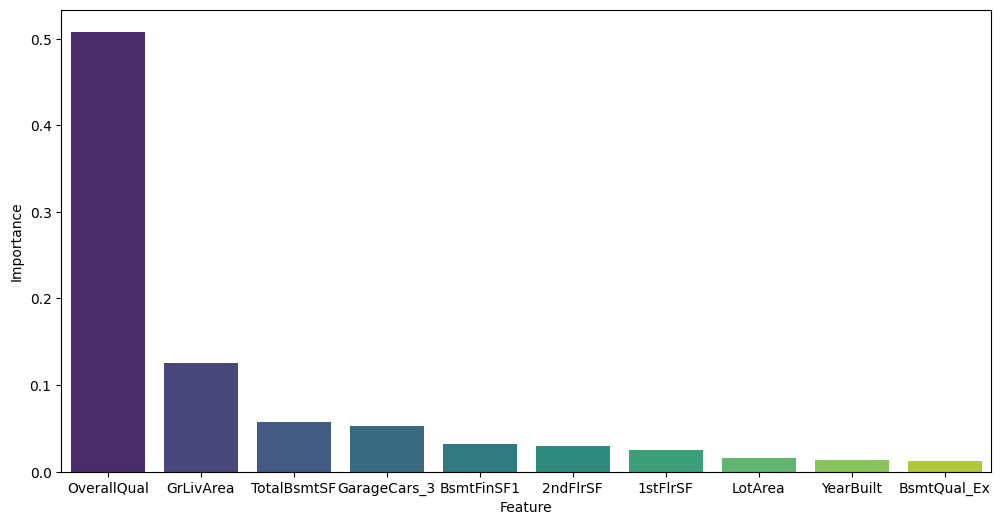

In [265]:
counts = gb.feature_importances_
columns = gb.feature_names_in_
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': counts})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df.head(10), palette='viridis')

For RandomForestRegressor: {'model__max_depth': 7, 'model__n_estimators': 200, 'variance_threshold__threshold': 0}

In [264]:
rf = RandomForestRegressor(n_estimators=200, max_depth=7, random_state=123)
rf.fit(train_preprocessed, y)

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=123)

<ipython-input-266-93dbd03b89cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance_df.head(10), palette='viridis')


<Axes: xlabel='Feature', ylabel='Importance'>

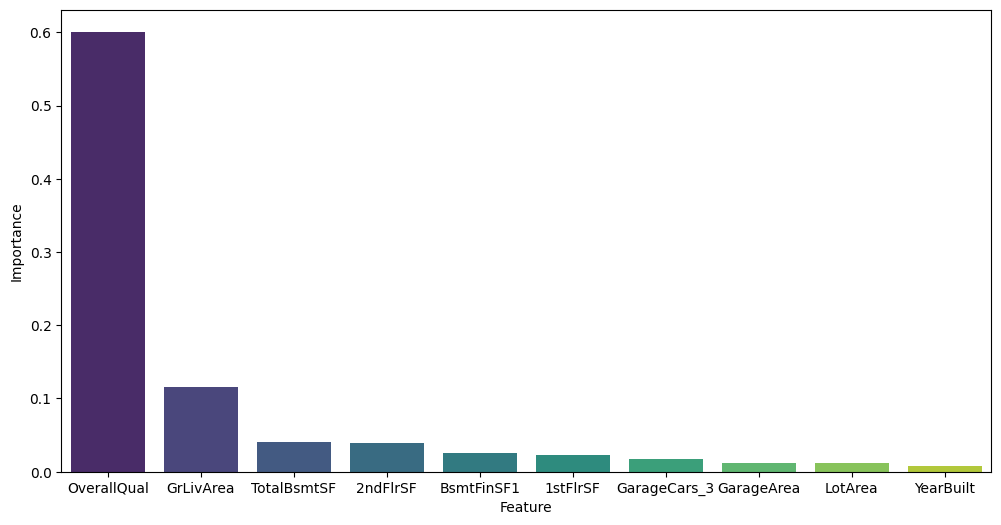

In [266]:
counts = rf.feature_importances_
columns = rf.feature_names_in_
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': counts})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df.head(10), palette='viridis')

**CONCLUSION:**
The most important feature in dataset are:


*   OverallQual(the overall material and finish of the house)
*   GrLivArea (Above grade (ground) living area square feet)
*   TotalBsmtSF (Total square feet of basement area)



> First two features are intuitively can be considered to be the most important, but the third one is of the greatest interest.


   There is a few articles on this topic:

[6 unusual things in every american house](https://www.forumdaily.com/6-neprivychnyx-veshhej-kotorye-est-v-kazhdom-amerikanskom-dome/)

# **Feature Engineering**